In [ ]:
#importing necessary packages
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
import tflearn
import tensorflow as tf
from PIL import Image
%matplotlib inline
#for writing text files
import glob
import os     
import random 
#reading images from a text file
from tflearn.data_utils import image_preloader
import math

In [ ]:
IMAGE_FOLDER = '/Users/nikita/Downloads/dogs-vs-cats-redux-kernels-edition/train/train'
TRAIN_DATA = '/Users/nikita/Downloads/dogs-vs-cats-redux-kernels-edition/train_data.txt'
TEST_DATA = '/Users/nikita/Downloads/dogs-vs-cats-redux-kernels-edition/test_data.txt'
VALIDATION_DATA = '/Users/nikita/Downloads/dogs-vs-cats-redux-kernels-edition/validation_data.txt'
train_proportion=0.7
test_proportion=0.2
validation_proportion=0.1

In [ ]:
#read the image directories
filenames_image = os.listdir(IMAGE_FOLDER)
#shuffling the data is important otherwise the model will be fed with a single class data for a long time and 
#network will not learn properly
random.shuffle(filenames_image)

In [4]:
#total number of images
total=len(filenames_image)
##  *****training data******** 
fr = open(TRAIN_DATA, 'w')
train_files=filenames_image[0: int(train_proportion*total)]
for filename in train_files:
    if filename[0:3] == 'cat':
        fr.write(IMAGE_FOLDER + '/'+ filename + ' 0\n')
    elif filename[0:3] == 'dog':
        fr.write(IMAGE_FOLDER + '/'+ filename + ' 1\n')

fr.close()
##  *****testing data******** 
fr = open(TEST_DATA, 'w')
test_files=filenames_image[int(math.ceil(train_proportion*total)):int(math.ceil((train_proportion+test_proportion)*total))]
for filename in test_files:
    if filename[0:3] == 'cat':
        fr.write(IMAGE_FOLDER + '/'+ filename + ' 0\n')
    elif filename[0:3] == 'dog':
        fr.write(IMAGE_FOLDER + '/'+ filename + ' 1\n')
fr.close()

##  *****validation data******** 
fr = open(VALIDATION_DATA, 'w')
valid_files=filenames_image[int(math.ceil((train_proportion+test_proportion)*total)):total]
for filename in valid_files:
    if filename[0:3] == 'cat':
        fr.write(IMAGE_FOLDER + '/'+ filename + ' 0\n')
    elif filename[0:3] == 'dog':
        fr.write(IMAGE_FOLDER + '/'+ filename + ' 1\n')
fr.close()

In [5]:
#Importing data
X_train, Y_train = image_preloader(TRAIN_DATA, image_shape=(56,56),mode='file', categorical_labels=True,normalize=True)
X_test, Y_test = image_preloader(TEST_DATA, image_shape=(56,56),mode='file', categorical_labels=True,normalize=True)
X_val, Y_val = image_preloader(VALIDATION_DATA, image_shape=(56,56),mode='file', categorical_labels=True,normalize=True)

In [6]:
print ("Dataset")
print ("Number of training images {}".format(len(X_train)))
print ("Number of testing images {}".format(len(X_test)))
print ("Number of validation images {}".format(len(X_val)))
print ("Shape of an image {}" .format(X_train[1].shape))
print ("Shape of label:{} ,number of classes: {}".format(Y_train[1].shape,len(Y_train[1])))

Dataset
Number of training images 17500
Number of testing images 5000
Number of validation images 2500
Shape of an image (56, 56, 3)
Shape of label:(2,) ,number of classes: 2


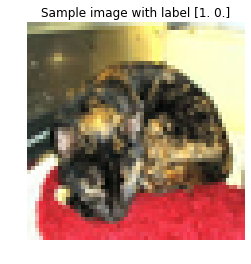

In [9]:
#Sample Image 
plt.imshow(X_train[1])
plt.axis('off')
plt.title('Sample image with label {}'.format(Y_train[1]))
plt.show()

In [10]:
#input image
x=tf.placeholder(tf.float32,shape=[None,56,56,3] , name='input_image') 
#input class
y_=tf.placeholder(tf.float32,shape=[None, 2] , name='input_class')

In [11]:
input_layer=x
#convolutional layer 1 --convolution+RELU activation
conv_layer1=tflearn.layers.conv.conv_2d(input_layer, nb_filter=64, filter_size=5, strides=[1,1,1,1],
                                        padding='same', activation='relu', regularizer="L2", name='conv_layer_1')

#2x2 max pooling layer
out_layer1=tflearn.layers.conv.max_pool_2d(conv_layer1, 2)


#second convolutional layer 
conv_layer2=tflearn.layers.conv.conv_2d(out_layer1, nb_filter=128, filter_size=5, strides=[1,1,1,1],
                                        padding='same', activation='relu',  regularizer="L2", name='conv_layer_2')
out_layer2=tflearn.layers.conv.max_pool_2d(conv_layer2, 2)
# third convolutional layer
conv_layer3=tflearn.layers.conv.conv_2d(out_layer2, nb_filter=128, filter_size=5, strides=[1,1,1,1],
                                        padding='same', activation='relu',  regularizer="L2", name='conv_layer_2')
out_layer3=tflearn.layers.conv.max_pool_2d(conv_layer3, 2)

#fully connected layer1
fcl= tflearn.layers.core.fully_connected(out_layer3, 4096, activation='relu' , name='FCL-1')
fcl_dropout_1 = tflearn.layers.core.dropout(fcl, 0.8)
#fully connected layer2
fc2= tflearn.layers.core.fully_connected(fcl_dropout_1, 4096, activation='relu' , name='FCL-2')
fcl_dropout_2 = tflearn.layers.core.dropout(fc2, 0.8)
#softmax layer output
y_predicted = tflearn.layers.core.fully_connected(fcl_dropout_2, 2, activation='softmax', name='output')


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:
#loss function
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_predicted+np.exp(-10)), reduction_indices=[1]))
#optimiser -
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
#calculating accuracy of our model 
correct_prediction = tf.equal(tf.argmax(y_predicted,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [13]:
# session parameters
sess = tf.InteractiveSession()
#initialising variables
init = tf.global_variables_initializer()
sess.run(init)
saver = tf.train.Saver()
save_path="/Users/Enkay/Documents/Viky/python/img-classification/mark3.ckpt"

In [14]:
# grabbing the default graph
g = tf.get_default_graph()

# every operations in our graph
[op.name for op in g.get_operations()]

['is_training/Initializer/Const',
 'is_training',
 'is_training/Assign',
 'is_training/read',
 'Assign/value',
 'Assign',
 'Assign_1/value',
 'Assign_1',
 'input_image',
 'input_class',
 'input_image_1',
 'input_class_1',
 'conv_layer_1/W/Initializer/random_uniform/shape',
 'conv_layer_1/W/Initializer/random_uniform/min',
 'conv_layer_1/W/Initializer/random_uniform/max',
 'conv_layer_1/W/Initializer/random_uniform/RandomUniform',
 'conv_layer_1/W/Initializer/random_uniform/sub',
 'conv_layer_1/W/Initializer/random_uniform/mul',
 'conv_layer_1/W/Initializer/random_uniform',
 'conv_layer_1/W',
 'conv_layer_1/W/Assign',
 'conv_layer_1/W/read',
 'conv_layer_1/W/Regularizer/L2Loss',
 'conv_layer_1/W/Regularizer/L2-Loss/y',
 'conv_layer_1/W/Regularizer/L2-Loss',
 'conv_layer_1/b/Initializer/Const',
 'conv_layer_1/b',
 'conv_layer_1/b/Assign',
 'conv_layer_1/b/read',
 'conv_layer_1/Conv2D',
 'conv_layer_1/BiasAdd',
 'conv_layer_1/Relu',
 'MaxPool2D/MaxPool',
 'conv_layer_2/W/Initializer/rando

In [15]:
epoch=3 # run for more iterations according your hardware's power
#change batch size according to your hardware's power. For GPU's use batch size in powers of 2 like 2,4,8,16...
batch_size=20 
no_itr_per_epoch=len(X_train)//batch_size

In [16]:
no_itr_per_epoch
n_test=len(X_test) #number of test samples
n_val=len(X_val)  #number of validation samples

In [ ]:
# Now iterate over our dataset n_epoch times
for iteration in range(epoch):
    print("Iteration no: {} ".format(iteration))
    
    previous_batch=0
    # Do our mini batches:
    for i in range(no_itr_per_epoch):
        current_batch=previous_batch+batch_size
        x_input=X_train[previous_batch:current_batch]
        x_images=np.reshape(x_input,[batch_size,56,56,3])
        
        y_input=Y_train[previous_batch:current_batch]
        y_label=np.reshape(y_input,[batch_size,2])
        previous_batch=previous_batch+batch_size
        
        _,loss=sess.run([train_step, cross_entropy], feed_dict={x: x_images,y_: y_label})
        if i % 100==0 :
            print ("Training loss : {}" .format(loss))
            
   
        
    x_test_images=np.reshape(X_test[0:n_test],[n_test,56,56,3])
    y_test_labels=np.reshape(Y_test[0:n_test],[n_test,2])
    Accuracy_test=sess.run(accuracy,
                           feed_dict={
                        x: x_test_images ,
                        y_: y_test_labels
                      })
    Accuracy_test=round(Accuracy_test*100,2)
    
    x_val_images=np.reshape(X_val[0:n_val],[n_val,56,56,3])
    y_val_labels=np.reshape(Y_val[0:n_val],[n_val,2])
    Accuracy_val=sess.run(accuracy,
                           feed_dict={
                        x: x_val_images ,
                        y_: y_val_labels
                      })    
    Accuracy_val=round(Accuracy_val*100,2)
    print("Accuracy ::  Test_set {} % , Validation_set {} % " .format(Accuracy_test,Accuracy_val))


Iteration no: 0 
Training loss : 0.7190305590629578
Training loss : 0.6489895582199097
Training loss : 0.5846332907676697
Training loss : 0.4911222457885742
Training loss : 0.5084767937660217
Training loss : 0.7475323677062988
Training loss : 0.6691168546676636
Training loss : 0.6359609961509705
Training loss : 0.4265771806240082


In [16]:
def process_img(img):
        img=img.resize((56, 56), Image.ANTIALIAS) #resize the image
        img = np.array(img)
        img=img/np.max(img).astype(float) 
        img=np.reshape(img, [1,56,56,3])
        return img


In [22]:
#test your own images 
test_image=Image.open('/Users/nikita/Pictures/abc.jpg')
test_image
test_image= process_img(test_image)
predicted_array= sess.run(y_predicted, feed_dict={x: test_image})
predicted_class= np.argmax(predicted_array)
if predicted_class==0:
    print ("It is a cat") 
else :
    print ("It is a dog")

It is a dog
